In [1]:
from datetime import timedelta
import pandas

import swasputils

In [2]:
zoo_subjects = swasputils.ZooniverseSubjects()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
workflow_retirements = {}
for workflow_id, workflow_subjects in zoo_subjects.workflows.items():
    retirement_dates = workflow_subjects.df[workflow_subjects.df['retired_at'].notna()]['retired_at']
    if len(retirement_dates.index) == 0:
        continue
    retirement_dates = retirement_dates.value_counts()
    retirement_dates.index = pandas.to_datetime(retirement_dates.index)
    retirement_dates.name = workflow_id
    workflow_retirements[workflow_id] = retirement_dates.resample('1D').count()
workflow_retirements = pandas.DataFrame(workflow_retirements)

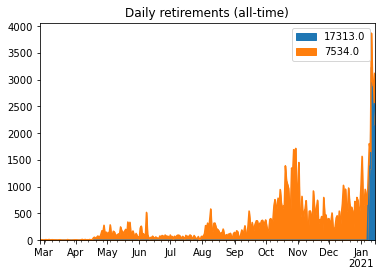

In [4]:
workflow_retirements.plot.area(
    title='Daily retirements (all-time)',
)

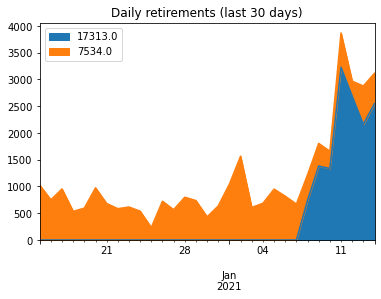

In [5]:
workflow_retirements[
    workflow_retirements.index >= (workflow_retirements.index.max() - timedelta(days=30))
].plot.area(
    title='Daily retirements (last 30 days)'
)